# Rafael Andreolli Prochnow  RA:176059

# Bibliotecas 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import math

### Gerar dados 

In [2]:
# Contém o conjunto de dados de entrada de classificador (2 atributos e 200 amostras)
X = np.loadtxt('X_input_matrix.csv', delimiter=',')

In [3]:
# Contém o rótulo de cada uma das amostras (Classe 1->"-1", Classe 2 ->"1")
D = np.loadtxt('d_vector_label.csv', delimiter=',')

In [4]:
def separacao(X, D):
    X_C1 = []
    D_C1 = []
    X_C2 = []
    D_C2 = []
    for i in range(len(X)):
        if D[i] == 1:
            X_C2.append(X[i])
            D_C2.append(D[i])
        else:
            X_C1.append(X[i])
            D_C1.append(D[i])
    return np.array(X_C1), np.array(D_C1), np.array(X_C2), np.array(D_C2)

In [5]:
X_C1, D_C1, X_C2, D_C2 = separacao(X, D)

### Gráfico de dispersão (scatter plot) dos dados de entrada utilizando diferentes cores para cada uma das classes

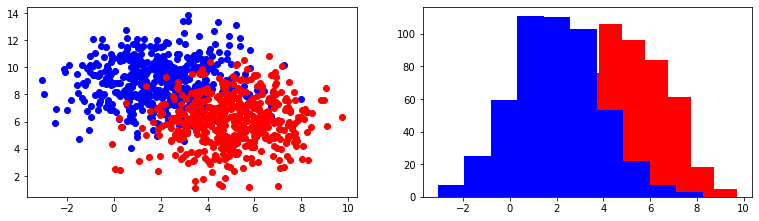

In [6]:
# Figuras
plt.figure(figsize=(13,3.5))
plt.subplot(1, 2, 1)
# Titulo
# labelx
# labely
plt.scatter(X_C1[:,0], X_C1[:,1], marker='o', c ='b')
plt.scatter(X_C2[:,0], X_C2[:,1], marker='o', c ='r')

plt.subplot(1, 2, 2)
# Titulo
# labelx
# labely
plt.hist(X_C2[:,0], color='r')
plt.hist(X_C1[:,0], color='b')
plt.show()

### Treinamento do classificador linear (mínimos quadrados) para o problema de classificação expresso nos dados

In [7]:
prop_test = 0.30 # proporção para o teste 
x_train, x_test, d_train, d_test = train_test_split(X, D, test_size=prop_test)

In [8]:
# Criar um modelo para conter todas as informações no meu modelo de Regressão Linear
model_reg_linear = LinearRegression()
# Ajustar o modelo
model_reg_linear.fit(x_train, d_train)

LinearRegression()

In [9]:
y_hat_train = model_reg_linear.predict(x_train)

### Considere a seguinte Regra de Decisão:

$$\hat{d_{i}} = \begin{Bmatrix}+1, \hat{y_{i}} > \delta \\ -1, \hat{y_{i}} < \delta \end{Bmatrix}$$

### Para três casos distintos ($\delta = 0$ ; $\delta = -0,2$ ; $\delta = 0,3$)

δ = 0 Acurácia de treinamento do Classificador Linear com  0.8928571428571429
δ = -0.2 Acurácia de treinamento do Classificador Linear com  0.8742857142857143
δ = 0.3 Acurácia de treinamento do Classificador Linear com  0.8357142857142857


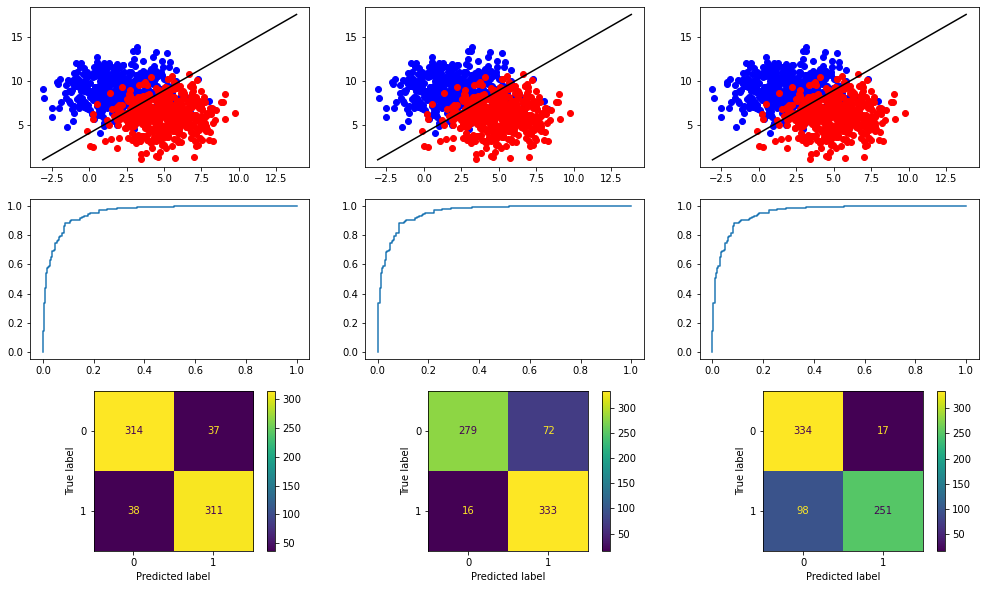

In [109]:
delta = [0, -0.2, 0.3]
tamanho = 0
fig, axs = plt.subplots(3, 3, figsize=(17, 10))
for i in delta:
    # Quero um vetor que da 1 para a posição onde tem erro é 0 na posição δ 
    d_hat_tain = np.array(list(map(lambda x: -1 if x < i else 1, y_hat_train)))
    # Vetor de indicador de erro de treinamento 
    error_train = np.abs((d_hat_tain - d_train)/2)

    # Acurácia do treinamento
    acc_train = 1 - (np.sum(error_train)/error_train.size)
    print(f'δ = {i} Acurácia de treinamento do Classificador Linear com ', acc_train)

    w_LS = np.zeros(3)
    w_LS[0] = model_reg_linear.intercept_
    w_LS[1] = model_reg_linear.coef_[0]
    w_LS[2] = model_reg_linear.coef_[1]

    xlaux = np.linspace(X.min(), X.max(), 2000)
    x2aux = -(w_LS[0]/w_LS[2]) -(w_LS[1]/w_LS[2])*xlaux 
    
    axs[0, tamanho].scatter(X_C1[:,0], X_C1[:,1], marker='o', c ='b')
    axs[0, tamanho].scatter(X_C2[:,0], X_C2[:,1], marker='o', c ='r')
    axs[0, tamanho].plot(xlaux, x2aux, 'k')
    # Titulo
    # labelx
    # labely
    # labels
    
    # Curva ROC
    # Saida dos limiares que são utilizados para construir 
    # fpr = False Positive Rating
    # tpr = True Positive Rating
    # thresholds = 
    fpr_train, tpr_train, thresholds_train = roc_curve(d_train, y_hat_train)
    
    # Gráfico
    axs[1, tamanho].plot(fpr_train, tpr_train)
    # Titulo
    # labelx
    # labely
    # labels
    # Matriz de confusão
    Conf_Matriz_train = confusion_matrix(d_train, d_hat_tain)
    # Realizar o plot da matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matriz_train)
    disp.plot(ax=axs[2, tamanho])
    
    tamanho += 1
plt.show()
figura.tight_layout()